<a href="https://colab.research.google.com/github/Bakti-05/StudiIndependen/blob/main/Basic_DL_untuk_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Orbit Future Academy](https://orbitfutureacademy.id/wp-content/uploads/2020/06/logo-2.jpg)

## Deep Learnig Basic

Pada tutorial ini merujuk pada kuliah terkenal yang diampuh oleh Lex Fridman [lecture on Deep Learning Basics](https://www.youtube.com/watch?list=PLrAXtmErZgOeiKm4sgNOknGvNjby9efdf&v=O5xeyoRL95U) yang merupakan bagian [MIT Deep Learning](https://deeplearning.mit.edu).

Tutorial basic ini akan mencoba untuk membuat model DL untuk salah satu kasus yang sangat terkenal, yaitu Digit Recognizer. Kita akan mencoba untuk mengajarkan komputer cara untuk 'melihat'

Mungkin, akan sangat baik (disarankan) untuk mengikuti [seri kuliah deep learning MOOC Lex Fridman](https://deeplearning.mit.edu/)  

Untuk menambah pengetahuan khusus nya basic fundation terkait DL, teman-teman bisa melihat [video NN Series dari 3blue1brown](https://youtu.be/aircAruvnKk)

Mari Mulai!

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

2.6.0


In [ ]:
# Untuk mengubah versi tensorflow ke

import tensorflow.compat.v1 as tf

## Classification of MNIST Dreams with Convolutional Neural Networks

Sekarang, mari kita bikin model convolutional neural network (CNN) classifier untuk mengklasifikasi gambar dari handwritten digits dari data MNIST dataset

In [ ]:
# Set common constants
this_repo_url = 'https://github.com/lexfridman/mit-deep-learning/raw/master/'
this_tutorial_url = this_repo_url + 'tutorial_deep_learning_basics'

MNIST dataset memiliki 70,000 grayscale gambar dari 'handwritten digits'
yang memiliki resolution sebesar 28 kali 28 pixels. 
<img src="https://i.imgur.com/ITrm9x4.png" width="500px">

Sekarang, mari kita kita (memuat) "load the dataset" yang merupakan gambar dengan 28x28 Numpy arrays, dengan pixel berada pada rentang dari 0 hingga 255 [0,255]. 255 pixel menyatakan ukuran rentang terbesar yang disimpan dalam komputer (dengan asumsi byte 8-bit). *Label* merupakan sebuah int array dengan rentang 0 hingga 9.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# reshape images to specify that it's a single channel
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

11501568/11490434 [==============================] - 0s 0us/step


Membuat perintah untuk melakukan klasifikasi biner (1 0) sebelum dimasukkan lagi ke dalam hiden layer/model jaringan syaraf. Untuk itu kita membagi nilai dengan 255, *traning set* dan *testing set* diproses dengan cara yang sama.


In [ ]:
def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

Perintah untuk menampilkan 5 gambar pertama dari *training set* dan menampilkan nama class (class name) disetiap bawah dari gambar. 

Tujuan nya tentu untuk memastikan bahwa data sudah benar/cocok 'fit' dan kita siap untuk melanjutkan dengan membangun model.



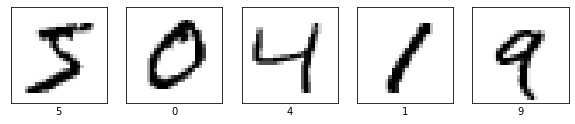

In [ ]:
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

### Build the model

Membangun jaringan saraf memerlukan konfigurasi lapisan model

In [ ]:
model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
# one more dropout
model.add(Dropout(0.5))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

Sebelum model benar-benar siap kita perlu melakukan tembahan/preparasi, dimana ini ditambahkan selama proses *compile* model, yang meliputi:

* *Loss function* 
* *Optimizer* 
* *Metrics* 

diskusikan apa itu *Loss function*, *Optimizer*, *Metrics* 

In [ ]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

Training model NN mengikuti langkah sebagai berikut: 

1. Masukkan data pelatihan ke model—dalam contoh ini, array `train_images` dan `train_labels`.
2. Model *belajar* dengan mengasosi atau mengolah gambar dan label
3. Kita membuat perintah untuk (meminta) model untuk membuat prediksi tentang set pengujian—dalam contoh ini, array `test_images`. Kita memverifikasi bahwa prediksi cocok dengan label dari array `test_labels`.

Untuk memulai pelatihan, panggil metode `model.fit`—modelnya "sesuai" dengan data pelatihan:

In [ ]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 163s 87ms/step - loss: 0.1882 - accuracy: 0.9432
Epoch 2/5
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0816 - accuracy: 0.9757
Epoch 3/5
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0603 - accuracy: 0.9816
Epoch 4/5
1875/1875 [==============================] - 164s 87ms/step - loss: 0.0503 - accuracy: 0.9844
Epoch 5/5
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0410 - accuracy: 0.9872


Dilakukan epoch sebanyak 5 kali dan ketika model melakukan pelatihan/training, metrik loss function dan juga accuracy ditampilkan. Terlihat bahwa accuracy meningkat dengan semakin banyak nya jumlah epoch. Model ini mencapai akurasi sekitar 98,68% pada data pelatihan.

### Evaluate accuracy

Langkah selanjutnya, yaitu membandingkan performa model pada test_dataset:

In [ ]:
print(test_images.shape)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

(10000, 28, 28, 1)
313/313 [==============================] - 7s 21ms/step - loss: 0.0285 - accuracy: 0.9910
Test accuracy: 0.9909999966621399


Sering kali, akurasi pada dataset pengujian sedikit kurang dari akurasi pada dataset pelatihan. Diskusikan! 


Kesenjangan antara akurasi pelatihan dan akurasi pengujian ini adalah contoh dari *overfitting*. Dalam kasus ini, akurasinya lebih baik di angka 99,19%!

### Make predictions

Dengan model yang dilatih, kita dapat menggunakannya untuk membuat prediksi tentang beberapa gambar. Untuk melihat bagaimana animasi ini dihasilkan, kunjungi [great blog post by hardmaru](http://blog.otoro.net/2016/04/01/generating-large-images-from-latent-vectors/) 


![MNIST dream](https://i.imgur.com/OrUJs9V.gif)

In [ ]:
mnist_dream_path = 'images/mnist_dream.mp4'
mnist_prediction_path = 'images/mnist_dream_predicted.mp4'

# download the video if running in Colab
if not os.path.isfile(mnist_dream_path): 
    print('downloading the sample video...')
    vid_url = this_tutorial_url + '/' + mnist_dream_path
    
    mnist_dream_path = urllib.request.urlretrieve(vid_url)[0]
                                                                                                  
def cv2_imshow(img):
    ret = cv2.imencode('.png', img)[1].tobytes() 
    img_ip = IPython.display.Image(data=ret)
    IPython.display.display(img_ip)

cap = cv2.VideoCapture(mnist_dream_path) 
vw = None
frame = -1 # counter for debugging (mostly), 0-indexed

# go through all the frames and run our classifier on the high res MNIST images as they morph from number to number
while True: # should 481 frames
    frame += 1
    ret, img = cap.read()
    if not ret: break
               
    assert img.shape[0] == img.shape[1] # should be a square
    if img.shape[0] != 720:
        img = cv2.resize(img, (720, 720))
       
    #preprocess the image for prediction
    img_proc = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_proc = cv2.resize(img_proc, (28, 28))
    img_proc = preprocess_images(img_proc)
    img_proc = 1 - img_proc # inverse since training dataset is white text with black background

    net_in = np.expand_dims(img_proc, axis=0) # expand dimension to specify batch size of 1
    net_in = np.expand_dims(net_in, axis=3) # expand dimension to specify number of channels
    
    preds = model.predict(net_in)[0]
    guess = np.argmax(preds)
    perc = np.rint(preds * 100).astype(int)
    
    img = 255 - img
    pad_color = 0
    img = np.pad(img, ((0,0), (0,1280-720), (0,0)), mode='constant', constant_values=(pad_color))  
    
    line_type = cv2.LINE_AA
    font_face = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1.3        
    thickness = 2
    x, y = 740, 60
    color = (255, 255, 255)
    
    text = "Neural Network Output:"
    cv2.putText(img, text=text, org=(x, y), fontScale=font_scale, fontFace=font_face, thickness=thickness,
                    color=color, lineType=line_type)
    
    text = "Input:"
    cv2.putText(img, text=text, org=(30, y), fontScale=font_scale, fontFace=font_face, thickness=thickness,
                    color=color, lineType=line_type)   
        
    y = 130
    for i, p in enumerate(perc):
        if i == guess: color = (255, 218, 158)
        else: color = (100, 100, 100)
            
        rect_width = 0
        if p > 0: rect_width = int(p * 3.3)
        
        rect_start = 180
        cv2.rectangle(img, (x+rect_start, y-5), (x+rect_start+rect_width, y-20), color, -1)

        text = '{}: {:>3}%'.format(i, int(p))
        cv2.putText(img, text=text, org=(x, y), fontScale=font_scale, fontFace=font_face, thickness=thickness,
                    color=color, lineType=line_type)
        y += 60
    
    # if you don't want to save the output as a video, set this to False
    save_video = True
    
    if save_video:
        if vw is None:
            codec = cv2.VideoWriter_fourcc(*'DIVX')
            vid_width_height = img.shape[1], img.shape[0]
            vw = cv2.VideoWriter(mnist_prediction_path, codec, 30, vid_width_height)
        # 15 fps above doesn't work robustly so we right frame twice at 30 fps
        vw.write(img)
        vw.write(img)
    
    # scale down image for display
    img_disp = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
    cv2_imshow(img_disp)
    IPython.display.clear_output(wait=True)
        
cap.release()
if vw is not None:
    vw.release()

NameError: ignored

Di atas menunjukkan prediksi jaringan dengan memilih neuron dengan output tertinggi.

Jika semuanya berjalan dengan benar, Anda akan mendapatkan animasi seperti ini, ketika proses running

![MNIST dream predictions](https://i.imgur.com/eMF9FOG.gif)

### Conclusion

Kita telah mempelajari basic dari deep learning untuk kasus klasifikasi. Selanjutnya, kita bisa mencoba hal lain dan seperti kata Steve Jobs, "Stay Hungry, Stay Foolish"

.................................................................................................................................................................................................................................




[Steve Jobs' 2005 Stanford Commencement Address](https://youtu.be/UF8uR6Z6KLc)

[Deep Learning State of the Art (2020)](https://youtu.be/0VH1Lim8gL8)

[MIT 6.S191 (2020): Convolutional Neural Networks](https://youtu.be/iaSUYvmCekI)

.................................................................................................................................................................................................................................

Selanjutnya, dapat melakukan aktivitas sederhana dengan mengklik tautan
[Aktivitas Sederhana: Simulasi Digit Recognizer](https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html)

Konten ini tidak mungkin dapat tercipta tanpa MOOC Deep Learning MIT by Lex Fridman